2-) Utilize uma rede neural perceptron de múltiplas camadas para aproximar a função abai-
xo.
f (x)  x12  x 22  2 x1 x 2  cos( x1  x 2 )  1) , x1  5, x 2  5
Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela
rede neural. Apresente também a curva da função custo no treinamento e a curva do erro
médio quadrado com relação ao o conjunto de validação. Procure definir a arquitetura da
rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada cama-
da e o número de neurônios camada de saída.
Observações. Como se trata de um problema de aproximação de funções, considere a ca-
mada de saída do tipo linear puro.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função
def func(x1, x2):
    return x1**2 + x2**2 + 2*x1*x2 + np.cos(x1 + x2) - 1

# Gerar dados
np.random.seed(42)
n_samples = 1000
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y = func(x1, x2)

# Dividir em conjuntos de treinamento e validação
from sklearn.model_selection import train_test_split
X = np.vstack((x1, x2)).T
y = y.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir o modelo
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Camada de saída linear pura

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 2s 17ms/step - loss: 674.1510 - mean_squared_error: 674.1510 - val_loss: 649.7656 - val_mean_squared_error: 649.7656
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 597.5111 - mean_squared_error: 597.5111 - val_loss: 561.5190 - val_mean_squared_error: 561.5190
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 498.7866 - mean_squared_error: 498.7866 - val_loss: 445.3319 - val_mean_squared_error: 445.3319
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 376.8652 - mean_squared_error: 376.8652 - val_loss: 309.0076 - val_mean_squared_error: 309.0076
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 250.6995 - mean_squared_error: 250.6995 - val_loss: 200.1814 - val_mean_squared_error: 200.1814
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 168.1022 - mean_squared_error: 168.1022 - val_loss: 141.6432 - val_mean_squared_e

313/313 [==============================] - 2s 6ms/step


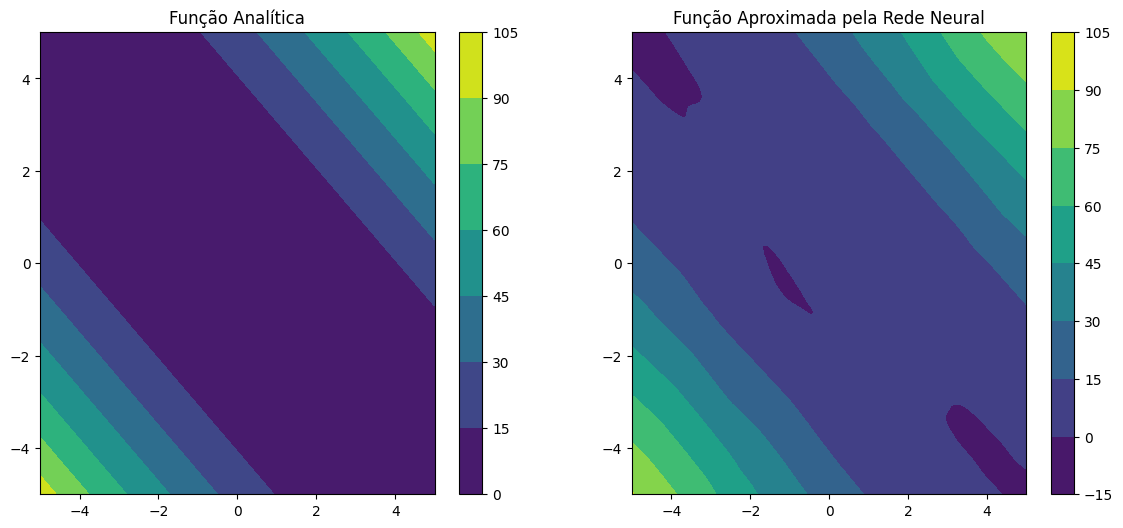

In [ ]:
# Gerar novos dados para plotagem
x1_plot = np.linspace(-5, 5, 100)
x2_plot = np.linspace(-5, 5, 100)
x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)
y_plot = func(x1_plot, x2_plot)

# Prever valores usando a rede neural
X_plot = np.vstack((x1_plot.ravel(), x2_plot.ravel())).T
y_pred = model.predict(X_plot).reshape(x1_plot.shape)

# Plotar a função analítica
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.contourf(x1_plot, x2_plot, y_plot, cmap='viridis')
plt.colorbar()
plt.title('Função Analítica')

# Plotar a função aproximada pela rede neural
plt.subplot(1, 2, 2)
plt.contourf(x1_plot, x2_plot, y_pred, cmap='viridis')
plt.colorbar()
plt.title('Função Aproximada pela Rede Neural')

plt.show()

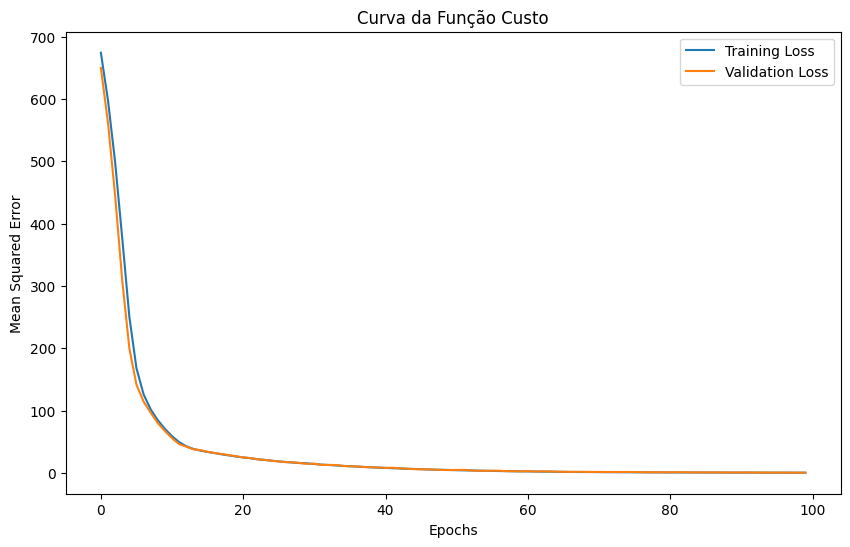

In [ ]:
# Plotar a curva da função custo
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Curva da Função Custo')
plt.show()
